In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [23]:
class Node:
    def __init__(self, value, level):
        self.value = value
        self.forward = [None] * (level + 1)

In [24]:
class SkipList:
    def __init__(self, max_level=32, p=0.5):
        self.MAX_LEVEL = max_level
        self.p = p
        self.header = Node(-float('inf'), self.MAX_LEVEL)
        self.level = 0  # Current highest level (0-based)

In [25]:
def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.MAX_LEVEL:
            lvl += 1
        return lvl

In [26]:
class SkipList:
    def __init__(self, max_level=32, p=0.5):
        self.MAX_LEVEL = max_level
        self.p = p
        self.header = Node(-float('inf'), self.MAX_LEVEL)
        self.level = 0  # Current highest level (0-based)


In [27]:
def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.MAX_LEVEL:
            lvl += 1
        return lvl

In [28]:
def insert(self, value):
        # Skip if already exists
        if self.search(value):
            return

        update = [None] * (self.MAX_LEVEL + 1)
        current = self.header

        # Find update pointers
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current

        # Create new node
        new_level = self.random_level()
        if new_level > self.level:
            for i in range(self.level + 1, new_level + 1):
                update[i] = self.header
            self.level = new_level

        new_node = Node(value, new_level)

        # Link pointers
        for i in range(new_level + 1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node

In [29]:
def search(self, value, count_levels=False):
        current = self.header
        levels_traversed = 0

        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
                levels_traversed += 1  # Each horizontal move counts
            levels_traversed += 1  # Dropping down a level counts

        # Move to the level 0 candidate
        current = current.forward[0]
        if current and current.value == value:
            if count_levels:
                return True, levels_traversed
            return True
        if count_levels:
            return False, levels_traversed
        return False

In [30]:
def delete(self, value):
        update = [None] * (self.MAX_LEVEL + 1)
        current = self.header

        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]
        if current and current.value == value:
            # Remove node
            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]

            # Update level if necessary
            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1
            return True
        return False

In [35]:
def run_experiment(sizes=[1000, 5000, 10000, 20000, 50000], num_trials=20, num_searches=500):
    results = []

    print("Running Skip List experiment...\n")
    print(f"{'Size (n)':<10} {'Avg Levels Searched':<20} {'Std Dev'}")
    print("-" * 45)

    for n in sizes:
        levels_per_trial = []

        for trial in range(num_trials):
            sl = SkipList()

            # Insert n unique random values
            values = random.sample(range(1, n * 3), n)  # Ensure uniqueness
            for val in values:
                sl.insert(val)

            # Perform searches and count levels traversed
            total_levels = 0
            search_values = random.choices(values, k=num_searches)  # Search existing values

            for val in search_values:
                _, levels = sl.search(val, count_levels=True)
                total_levels += levels

            avg_levels = total_levels / num_searches
            levels_per_trial.append(avg_levels)

        avg_over_trials = np.mean(levels_per_trial)
        std_over_trials = np.std(levels_per_trial)

        results.append((n, avg_over_trials, std_over_trials))
        print(f"{n:<10} {avg_over_trials:<20.2f} {std_over_trials:.2f}")

    return results
def plot_results(results):
    sizes = [r[0] for r in results]
    avg_levels = [r[1] for r in results]
    std_levels = [r[2] for r in results]

    plt.figure(figsize=(10, 6))
    plt.errorbar(sizes, avg_levels, yerr=std_levels, fmt='o-', capsize=5, label='Observed', color='blue')

    # Theoretical O(log n) reference
    log_sizes = [np.log2(n) for n in sizes]
    # Fit a line: avg_levels ≈ a * log2(n) + b
    coeffs = np.polyfit(log_sizes, avg_levels, 1)
    theoretical = [coeffs[0] * np.log2(n) + coeffs[1] for n in sizes]
    plt.plot(sizes, theoretical, '--', label=f'Theoretical ≈ {coeffs[0]:.2f} log₂(n) + {coeffs[1]:.2f}', color='red')

    plt.xlabel('Number of Elements (n)')
    plt.ylabel('Average Number of Levels Searched')
    plt.title('Skip List Search Efficiency\n(n vs. Average Levels Traversed)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xscale('log', base=2)  # Log scale for better visualization
    plt.tight_layout()
    plt.show()

Running Skip List experiment...

Size (n)   Avg Levels Searched  Std Dev
---------------------------------------------
1000       20.69                2.29
5000       25.58                1.49
10000      27.30                3.03
20000      28.73                1.91
50000      31.39                1.88
100000     34.09                1.73


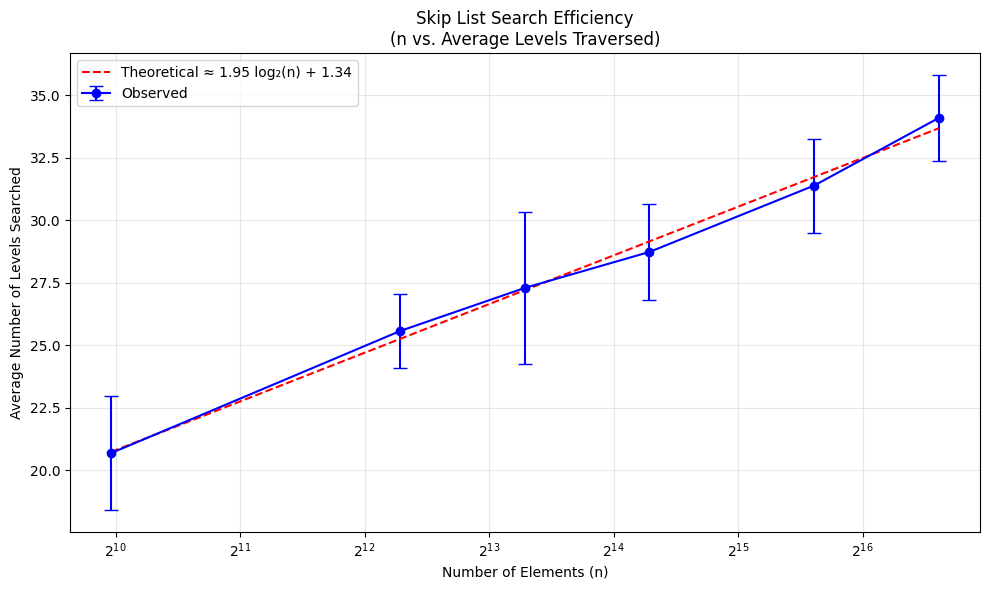

In [36]:
if __name__ == "__main__":
    sizes = [1000, 5000, 10000, 20000, 50000,100000]
    results = run_experiment(sizes=sizes, num_trials=20, num_searches=500)
    plot_results(results)